In [1]:
import sys
import os



import numpy as np
from SynthTempNetwork import Individual, SynthTempNetwork
from TemporalNetwork import ContTempNetwork
from FlowStability import FlowIntegralClustering
import pickle

import matplotlib.pyplot as plt

Could not load sparse_dot_mkl. Will use scipy.sparse for matrix products.


PID  83099  :  merged  125  events
PID  83099  :  merged  0  events


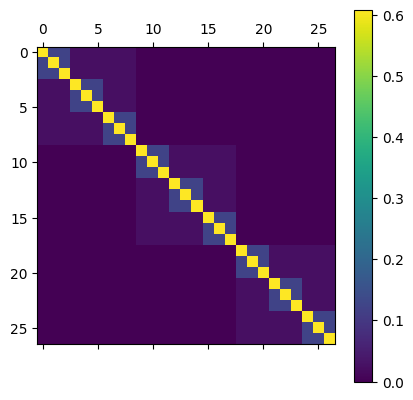

In [2]:
inter_tau = 10
activ_tau = 10
num_inter_per_activ = 1
t_start = 0
t_end = 100
n_groups = 27
n_per_group = 3
individuals = []

for g in range(n_groups):

    individuals.extend([Individual(i, inter_distro_scale=inter_tau,
                          activ_distro_scale=activ_tau, group=g) for i in \
            range(g*n_per_group,(g+1)*n_per_group)])


# level1 strength to level 2
r12 = 5
# level1 strength to level 3
r13 = r12*5
# level1 strength to background
# r14 = r13*10

# level 1 auto-strength with b4 = 0
b1 = 1/(1+2/r12+6/r13)
b2 = b1/r12
b3 = b1/r13
b4 = 0


inter_module_probs = np.ones((3,3))*b3
sub_module_probs = np.array([[b1, b2, b2],
                             [b2, b1, b2],
                             [b2, b2, b1]])
    
B0 = np.concatenate((sub_module_probs,
                inter_module_probs,
                inter_module_probs),axis=1)
 
B1 = np.concatenate((inter_module_probs,
                sub_module_probs,
                inter_module_probs),axis=1)

B2 = np.concatenate((inter_module_probs,
                inter_module_probs,
                sub_module_probs),axis=1)

B = np.concatenate((B0,B1,B2),axis=0)

Cinter = np.ones_like(B)*b4

C = np.concatenate((np.concatenate((B,Cinter,Cinter),axis=1),
                    np.concatenate((Cinter,B,Cinter),axis=1),
                    np.concatenate((Cinter,Cinter,B),axis=1),
                    ),axis=0)

inter_group_probs = C

plt.matshow(C)
plt.colorbar()



sim = SynthTempNetwork(individuals=individuals, t_start=t_start, t_end=t_end,
                        next_event_method='block_probs',
                        inter_group_probs=inter_group_probs,
                        num_interactions_per_activation=num_inter_per_activ)

sim.run(save_all_states=True, save_dt_states=True, verbose=False)



net = ContTempNetwork(source_nodes=sim.indiv_sources,
                        target_nodes=sim.indiv_targets,
                        starting_times=sim.start_times,
                        ending_times=sim.end_times,
                        merge_overlapping_events=True)
    

In [3]:
net.events_table

,source_nodes,target_nodes,starting_times,ending_times,durations
0,48,29,0.022184,0.571979,0.549795
1,21,23,0.225805,9.572575,9.346771
2,9,10,0.229995,8.378828,8.148833
3,2,0,0.390891,4.532631,4.141740
4,66,68,0.403638,1.656286,1.252647
...,...,...,...,...,...
626,57,76,97.512050,99.426690,1.914640
627,21,25,98.138673,98.651439,0.512766
628,55,54,98.718657,99.432099,0.713442
629,26,24,99.179320,99.323621,0.144301


In [4]:
net.compute_laplacian_matrices()

In [5]:
x= [[1,1],[0,1]]
print(np.ma.log(x[1][0]))

--


In [6]:
lamdas=np.logspace(-3,2,10)
print(lamdas)

[1.00000000e-03 3.59381366e-03 1.29154967e-02 4.64158883e-02
 1.66810054e-01 5.99484250e-01 2.15443469e+00 7.74263683e+00
 2.78255940e+01 1.00000000e+02]


In [7]:
for i in lamdas:
    net.compute_inter_transition_matrices(lamda=i, dense_expm=False, use_sparse_stoch=False)
    net.compute_transition_matrices(lamda=i)
    net.compute_entropy(lamda=i, force_csr=True)
    # net.compute_vonNeumann_entropy(lamda=i, force_csr=True)
    net.compute_simple_vonNeumann_entropy(lamda=i, force_csr=True)
    net.compute_entropy2(lamda=i, force_csr=True)

/Users/samuelkoovely/Documents/GitHub/flow_stability/TemporalNetwork.py:2138: RuntimeWarning: invalid value encountered in scalar divide
  if np.isfinite(np.log(array_diagpQ[i][j]/array_diagpQ[j][i])):
/Users/samuelkoovely/Documents/GitHub/flow_stability/TemporalNetwork.py:2164: RuntimeWarning: invalid value encountered in scalar divide
  if np.isfinite(np.log(array_diagpQ[i][j]/array_diagpQ[j][i])):


In [8]:
list_forw_flows = []

for i in lamdas:
    list_forw_flows.append(FlowIntegralClustering(T_inter_list=net.inter_T[i],
                                  time_list=net.times,
                                  verbose=True))

PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.33s
integral took 0.41s
PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.33s
integral took 0.41s
PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.32s
integral took 0.41s
PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.33s
integral took 0.42s
PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.32s
integral took 0.41s
PID  83099  : computing T_list
PID  83099  : computing integral
PID  83099  :  0  over  1261  took 0.00s
PID  83099  :  1000  over  1261  took 0.32s
integr

In [9]:
list_forw_flows[0].I_list[0]

81x81 sparse autocovariance matrix with symmetric PT:
<81x81 sparse matrix of type '<class 'numpy.float64'>'
	with 2187 stored elements in Compressed Sparse Row format>

In [10]:
for i in range(len(lamdas)):
    list_forw_flows[i].find_louvain_clustering()

In [11]:
list_forw_flows[0].partition[0].cluster_list

[{0, 1, 2},
 {3, 4, 5},
 {6, 7},
 {9, 10, 11},
 {12, 13, 14},
 {15, 17},
 {8, 16},
 {18, 19, 20},
 {21, 22, 23},
 {24, 25, 26},
 {27, 28, 29},
 {30},
 {31, 33},
 {32},
 {34, 35},
 {36, 37},
 {38},
 {39, 40, 41},
 {42, 43, 44},
 {45, 46, 47},
 {48, 49, 50},
 {51, 52, 53},
 {54, 55, 56},
 {57, 58, 59},
 {60, 61, 62},
 {70},
 {63, 64, 65},
 {66, 67, 68},
 {69, 71},
 {72, 73},
 {74},
 {75},
 {76, 77},
 {78, 79, 80}]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


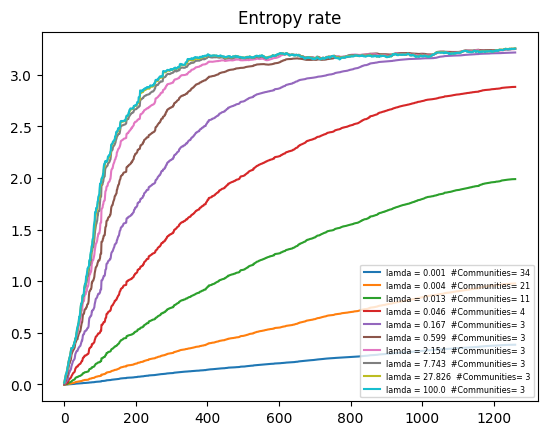

In [16]:
for i in range(len(lamdas)):
    plt.plot(net.S[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Entropy rate')
plt.savefig('./fig_entropy_rate', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


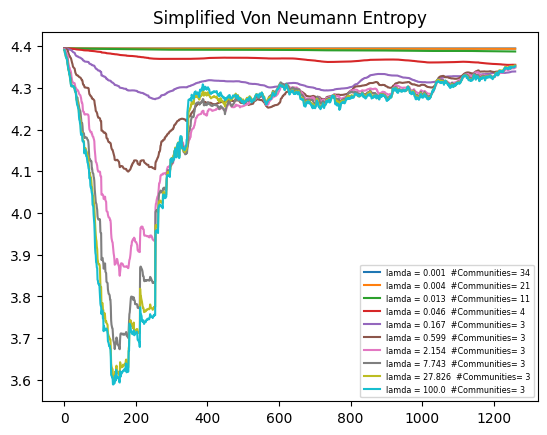

In [17]:
for i in range(len(lamdas)):
    plt.plot(net.simple_vNS[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Simplified Von Neumann Entropy')
plt.savefig('./fig_simple_vNEntropy', format='eps')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


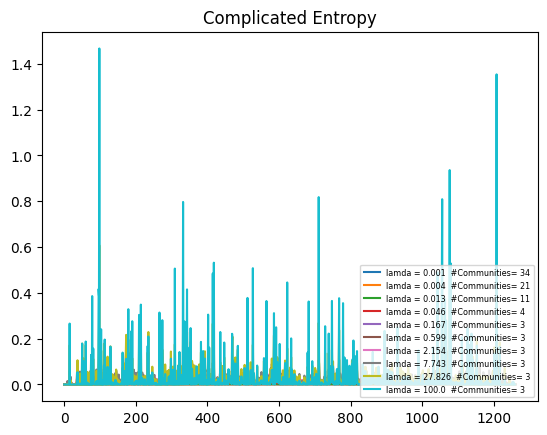

In [18]:
for i in range(len(lamdas)):
    plt.plot(net.S2[lamdas[i]], label='lamda = ' + str(round(lamdas[i], 3)) + '  #Communities= ' + str(len(list_forw_flows[i].partition[0].cluster_list)))
plt.legend(fontsize='xx-small', loc='lower right')
plt.title('Complicated Entropy')
plt.savefig('./fig_complicated_entropy', format='eps')

In [ ]:
laplacianex = net.laplacians[100]

In [ ]:
sum_ex = 0
for i in range(laplacianex.shape[0]):
    col_i = laplacianex.getcol(i)
    row_i = laplacianex.getrow(i)
    divide = np.divide(col_i,row_i)
    divide[np.isnan(divide)] = 0
    sum_ex += np.sum(divide)

In [ ]:
net.S2[0.001][1150:]

In [ ]:
net.compute_inter_transition_matrices(lamda= 0.1, dense_expm=False, use_sparse_stoch=False)
net.compute_transition_matrices(lamda=0.1)
net.compute_entropy(lamda=0.1, force_csr=True)
plt.plot(net.S[0.1])

In [ ]:
net.compute_vonNeumann_entropy(lamda=0.1, force_csr=True)
plt.plot(net.vNS[0.1])

In [ ]:
plt.plot(net.S[0.1])
plt.plot(net.vNS[0.1])